# Data Representation in Python - Line Plots and Bar charts
This notebook briefly summarizes two basic representation types for data representation in Python: line plots and bar charts. They are well-explained in the videos ["Line Plots"](https://www.coursera.org/lecture/python-plotting/line-plots-udxNu) and ["Bar Charts"](https://www.coursera.org/lecture/python-plotting/bar-charts-AC9zC) of week 2 of course 2 (Applied Plotting, Charting & Data Representation in Python) of the specialization ["Applied Data Science with Python"](https://www.coursera.org/specializations/data-science-python), offered by the University of Michigan on coursera.

## Line Plots
Based on abovementioned video ["Line Plots"](https://www.coursera.org/lecture/python-plotting/line-plots-udxNu).

### Preparation: importing packages, defining data arrays, plotting first simple graph
As a start, we'll use the numpy package ([documentation here](https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html)) and the matplotlib library for graphical representations ([docs here](https://matplotlib.org/contents.html)) to plot an array of ascending integer values and their squared values.
The plot canvases will be created when executing the code cells (one by one or as a batch).

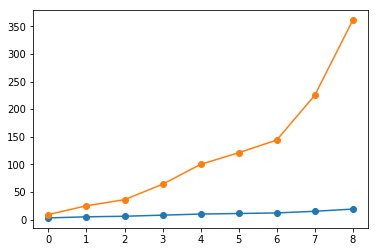

In [17]:
import numpy as np
import matplotlib.pyplot as plt

ascending_data = np.array([3,5,6,8,10,11,12,15,19])
# Use broadcasting to square each value of ascending_data element-wise
squared_data = ascending_data**2

# Use
plt.figure()
plt.plot(ascending_data, '-o', squared_data, '-o')

### Adding labels and title
We'll have a look here briefly how to add labels, title and legend to the graph; to keep the code cells clear, we won't keep doing that for all subsequent graphs in this notebook.

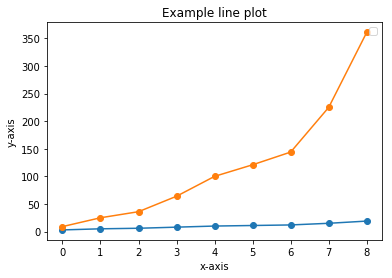

In [99]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Example line plot')
plt.legend(['ascending_data', 'squared_data'])
plt.plot(ascending_data, '-o', squared_data, '-o')

### Adding filling
Let's fill the area between the lines; but only until the third-last value (indicated by reducing the index range used by the fill by -2). Let's also add a transparency value of 0.25.

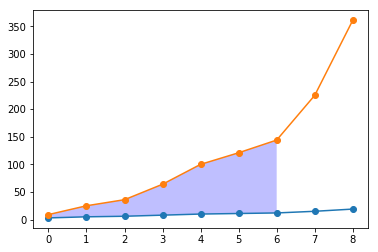

In [26]:
plt.gca().fill_between(range(len(ascending_data)-2),
                      ascending_data[:-2], squared_data[:-2],
                      facecolor='blue',
                      alpha=0.25)
plt.plot(ascending_data, '-o', squared_data, '-o')

### Datetime handling
We'll change the x-axis units to datetime instances now. We'll use a helper library from the Pandas package (which we'll import now), because it "specifically converts NumPy dates into standard library dates which is what matplotlib is expecting" (to learn more about the confusion created by a dozen ways of datetime handling in Python, watch video "Line Plots" from minute 4:00 and read a bit in the [numpy docs](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html#changes-with-numpy-1-11) about this topic)

We'll also play a bit with the axis ticklabels. For that,
- we'll use the function "gca" to reference to the plot elements as described [here, in the matplotlib docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html);
- we'll then use the [axis and tick API](https://matplotlib.org/api/axis_api.html) to get the current axis instance;
- then we'll use functions like "set_rotation" from the matplotlib [text API](https://matplotlib.org/api/text_api.html).

Lastly, we'll squeeze the plot a bit with the subplots_adjust function from the pyplot library ([its multitude of functions being documented here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)).

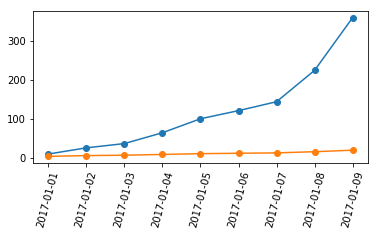

In [102]:
import pandas as pd
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-10', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates)
observation_dates = list(observation_dates)
plt.plot(observation_dates, squared_data, '-o',
        observation_dates, ascending_data, '-o')

# Refer to the xaxis from the plot
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_position([1,0])
    item.set_rotation(75)

# Squeeze plot
plt.subplots_adjust(bottom=0.35)

## Bar Plots
Based on abovementioned video ["Bar Charts"](https://www.coursera.org/lecture/python-plotting/bar-charts-AC9zC)

Using the same data as for the line plots above (ascending_data and squared_data), we'll create a bar chart.

To add the second set of data, we first have to shift the new bars on the x-axis (by adding +0.20 every time).

By using argument "zorder", you may define which bar set appears in which layer (0: background, ~1000: foreground, layers in between can have all whole numbers in between)

Choose colour keywords here: https://matplotlib.org/users/colors.html

Pyplot bar library documentation here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

<BarContainer object of 9 artists>

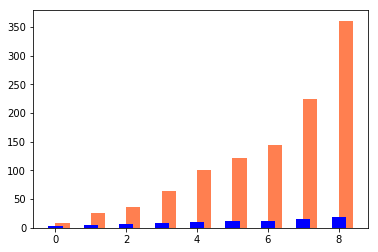

In [120]:
plt.figure()
xvals = range(len(ascending_data))
plt.bar(xvals, ascending_data, width = 0.4, color='blue', zorder = 10)

new_xvals = []
for item in xvals:
    new_xvals.append(item+0.20)
    
plt.bar(new_xvals, squared_data, width=0.4, color='coral', zorder=0)